In [1]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [3]:
# обычное сравнение
fuzz.ratio('Привет мир', 'Привет мир')

100

In [4]:
fuzz.ratio('тевирп рим', 'Привет мир')

30

In [5]:
# Частичное сравнение
fuzz.partial_ratio('Привет мир', 'Бред привет мир! Чушь')

90

In [6]:
# Сравнение по токену
fuzz.token_sort_ratio('Привет наш мир', 'мир наш ПриВЕт')

100

In [7]:
# сравнение, в отличие от прошлого, приравнивает строки, если их отличие заключается в повторении слов.
fuzz.token_set_ratio('Привет наш мир', 'мир мир наш наш наш ПриВЕт')

100

In [8]:
# Продвинутое обычное сравнение
print(fuzz.WRatio('Привет наш мир', '!ПриВЕт наш мир!'))
print(fuzz.WRatio('Привет наш мир', '!ПриВЕт, наш мир!'))

100
97


In [9]:
# Работа со списком
city = ["Москва", "Санкт-Петербург", "Саратов", "Краснодар", "Воронеж", "Омск", "Екатеринбург", "Орск", "Красногорск", "Красноярск", "Самара"]
process.extract("Саратов", city, limit=2)

[('Саратов', 100), ('Самара', 62)]

In [10]:
process.extractOne("Краногрск", city)

('Красногорск', 90)

In [11]:
from xml.etree import cElementTree as ElementTree

In [12]:
def get_unique_subjects(norm_data):
    unique_subjects = set()
    for document in norm_data:
        unique_subjects.add(document['subject'])
    return unique_subjects

In [13]:
from copy import copy
import pprint

def dictify(r,root=True):
    key = r.tag.replace('{http://www.romip.ru/data/common}', '')
    if root:
        return {key : dictify(r, False)}
    d=copy(r.attrib)
    if r.text:
        d["_text"]=r.text
    for x in r.findall("./*"):
        key = x.tag.replace('{http://www.romip.ru/data/common}', '')
        if key not in d:
            d[key] = []
        d[key].append(dictify(x, False))
    return d


tree = ElementTree.parse('news2006/news-080404.xml')
# dictify(tree.getroot())

In [14]:
import base64

def get_norm_data(tree):
    data = dictify(tree.getroot())
    norm_data = []
    for document in data['dataset']['document']:
        # pprint.pp(document)

        result = dict()
        result['subject'] = base64.b64decode(document['subject'][0]['_text']).decode("cp1251")
        result['content'] = base64.b64decode(document['content'][0]['_text']).decode("cp1251")
        norm_data.append(result)
    return norm_data

norm_data = get_norm_data(ElementTree.parse('news2006/news-080404.xml'))
pprint.pp(norm_data[:2])

unique_subjects = get_unique_subjects(norm_data)
print(f'all: {len(norm_data)} unique: {len(unique_subjects)}  ratio: {len(unique_subjects) * 100.0/ len(norm_data):2.2f}%')

[{'subject': 'Кудрин: Министры смогут сами создавать межведомственные комиссии '
             'для координации работы между министерствами',
  'content': 'Министр финансов РФ Алексей Кудрин предложил правительству '
             'упразднить значительную часть комиссий, в которых сам работал.\n'
             'Об этом сообщает РИА "Новости".\n'
             '"Ответственность за предлагаемые решения должны нести министры", '
             '- сказал он журналистам.\n'
             'В частности, он считает целесообразным передать функции комиссии '
             'по вопросам присоединения России к ВТО и комиссии по защитным '
             'мерам во внешней торговле и таможенно-тарифной политике '
             'министерству экономического развития и торговли, поскольку '
             'именно за ним закреплены эти задачи.\n'
             'Кудрин также сообщил, что министры смогут самостоятельно без '
             'соответствующих решений правительства создавать межведомственные '
             '

In [15]:
norm_data = get_norm_data(ElementTree.parse('news2006/news-shevard.xml'))
pprint.pp(norm_data[:2])

unique_subjects = get_unique_subjects(norm_data)
print(f'all: {len(norm_data)} unique: {len(unique_subjects)}  ratio: {len(unique_subjects) * 100.0/ len(norm_data):2.2f}%')

[{'subject': 'Председатель Комитета Госдумы России по делам СНГ и связям с '
             'соотечественниками посетит Бурятию',
  'content': '25 ноября в Бурятии будут встречать председателя Комитета '
             'Госдумы России по делам СНГ и связям с соотечественниками Андрея '
             'Кокошина.\n'
             'Он планирует встретиться с рабочими Улан-Удэнского '
             'локомотивовагоноремонтного завода, побывать на пограничных '
             'заставах в Кяхтинском районе.\n'
             'Также в планах Андрея Кокошина - встречи с жителями '
             'Мухоршибирского района.\n'
             'Как сообщили БГТРК в бурятском региональном отделении '
             '"Молодежного единства", Андрея Кокошина ждут на одном из '
             'пунктов, где эта организация бесплатно распространяет наркотесты '
             'в рамках программы борьбы с наркоманией.\n'},
 {'subject': '50% продавцов Казани не имеют спецодежды',
  'content': 'В каких условиях трудятся продавцы ка

In [16]:
norm_data = get_norm_data(ElementTree.parse('news2006/news-vybory.xml'))
pprint.pp(norm_data[:2])

unique_subjects = get_unique_subjects(norm_data)
print(f'all: {len(norm_data)} unique: {len(unique_subjects)}  ratio: {len(unique_subjects) * 100.0/ len(norm_data):2.2f}%')

[{'subject': 'Восстановят колокольню храма Трех Исповедников в Тверской '
             'области',
  'content': '6 декабря в 11.00 около храма Трех Исповедников церкви '
             'Воскресения Христова состоится торжественная закладка первого '
             'камня колокольни этого храма, которая была до основания '
             'разрушена в годы советской власти.\n'
             'Перед тем как приступить к закладке, архиепископ Тверской и '
             'Кашинский владыка Виктор отслужит в храме молебен о начале '
             'благого дела.\n'},
 {'subject': 'В Петербурге грабители напали на кафе',
  'content': 'САНКТ-ПЕТЕРБУРГ, 3 декабря.\n'
             'В Санкт-Петербурге совершено нападение на кафе "СССР" на Невском '
             'проспекте.\n'
             'Как сообщили "Росбалту" в ГУВД, во вторник утром двое '
             'неизвестных, предположительно, подобрав ключ к замку входной '
             'двери, вошли в кафе, ударили по голове тяжелым предметом '
             'сто

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster

%matplotlib inline
matplotlib.use('nbagg')
plt.rcParams['figure.figsize'] = [10, 5]

# settings to display all columns
pd.set_option("display.max_columns", None)

In [18]:
texts = [x['content'] for x in norm_data]
topics = [x['subject'] for x in norm_data]
texts[0], topics[0]

('6 декабря в 11.00 около храма Трех Исповедников церкви Воскресения Христова состоится торжественная закладка первого камня колокольни этого храма, которая была до основания разрушена в годы советской власти.\nПеред тем как приступить к закладке, архиепископ Тверской и Кашинский владыка Виктор отслужит в храме молебен о начале благого дела.\n',
 'Восстановят колокольню храма Трех Исповедников в Тверской области')

In [19]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']

def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

def penn_to_wn(tag):
    if is_adjective(tag):
        return wn.ADJ
    elif is_noun(tag):
        return wn.NOUN
    elif is_adverb(tag):
        return wn.ADV
    elif is_verb(tag):
        return wn.VERB
    return wn.NOUN

In [20]:
import nltk
import re
from nltk.corpus import stopwords

import pymystem3
pymystem3.constants.MYSTEM_DIR = '/Volumes/TOSHIBA EXT/repos/bmstu/ИПС/bin'
pymystem3.constants.MYSTEM_BIN = '/Volumes/TOSHIBA EXT/repos/bmstu/ИПС/bin/mystem'

mystem = pymystem3.Mystem()

stopwords = stopwords.words('russian')

def tokens_normalizer(words):
    tags = nltk.pos_tag(words)

    res = []
    for tag in tags:
        wn_tag = penn_to_wn(tag[1])
        res.append(WordNetLemmatizer().lemmatize(tag[0],wn_tag))
        print("!", res[-1], tag)
    return res

def get_words(sentence):
    processed_text = sentence.lower()
    processed_text = re.sub('[^a-zA-Zа-я]', ' ', processed_text)
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return nltk.word_tokenize(processed_text)

# Cleaing the text
def clear_text(text):
    all_sentences = nltk.sent_tokenize(text)
    # print(all_sentences)

    all_words = []
    for sent in all_sentences:
        words_analized = mystem.analyze(sent)
        all_words += [
            words['analysis'][0]['lex']
            for words in words_analized
            if words.get('analysis')
        ]

    return [word for word in all_words if (word not in stopwords or len(word) > 2)]

print(texts[0])
print(clear_text(texts[0]))

6 декабря в 11.00 около храма Трех Исповедников церкви Воскресения Христова состоится торжественная закладка первого камня колокольни этого храма, которая была до основания разрушена в годы советской власти.
Перед тем как приступить к закладке, архиепископ Тверской и Кашинский владыка Виктор отслужит в храме молебен о начале благого дела.

['декабрь', 'около', 'храм', 'три', 'исповедник', 'церковь', 'воскресение', 'христов', 'состояться', 'торжественный', 'закладка', 'первый', 'камень', 'колокольня', 'этот', 'храм', 'который', 'быть', 'основание', 'разрушать', 'год', 'советский', 'власть', 'перед', 'как', 'приступать', 'закладка', 'архиепископ', 'тверская', 'кашинский', 'владыка', 'виктор', 'отслуживать', 'храм', 'молебен', 'начало', 'благой', 'дело']


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(
                             input='content',
                             analyzer='word',
                             tokenizer=clear_text,
                             sublinear_tf=True,
                             use_idf=True,
                             min_df=0.01,
                             ngram_range=(1,3),
                             stop_words=stopwords
                            )

vectors = vectorizer.fit_transform(texts)
names = vectorizer.get_feature_names_out()
data = vectors.todense().tolist()# Create a dataframe with the results
df = pd.DataFrame(data, columns=names)
tfidf_matrix = df.copy()
tfidf_matrix

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['весь', 'свой', 'это'] not in stop_words.
  warnings.warn(


авария  август  автомобиль  автомобильный  автономный  \
0         0.0     0.0    0.000000            0.0         0.0   
1         0.0     0.0    0.000000            0.0         0.0   
2         0.0     0.0    0.108898            0.0         0.0   
3         0.0     0.0    0.000000            0.0         0.0   
4         0.0     0.0    0.000000            0.0         0.0   
...       ...     ...         ...            ...         ...   
11825     0.0     0.0    0.000000            0.0         0.0   
11826     0.0     0.0    0.000000            0.0         0.0   
11827     0.0     0.0    0.000000            0.0         0.0   
11828     0.0     0.0    0.000000            0.0         0.0   
11829     0.0     0.0    0.000000            0.0         0.0   

       автономный округ  автор  агентство  агитационный  агитация  аграрный  \
0                   0.0    0.0   0.000000           0.0       0.0  0.000000   
1                   0.0    0.0   0.000000           0.0       0.0  0.000000   
2                   0.0    0.0   0.096783           0.0       0.0  0.000000   
3                   0.0    0.0   0.137764           0.0       0.0  0.000000   
4                   0.0    0.0   0.196634           0.0       0.0  0.000000   
...                 ...    ...        ...           ...       ...       ...   
11825               0.0    0.0   0.000000           0.0       0.0  0.000000   
11826               0.0    0.0   0.000000           0.0       0.0  0.000000   
11827               0.0    0.0   0.000000           0.0       0.0  0.000000   
11828               0.0    0.0   0.000000           0.0       0.0  0.119894   
11829               0.0    0.0   0.000000           0.0       0.0  0.000000   

       аграрный партия  аграрный партия россия  адвокат  административный  \
0             0.000000                     0.0      0.0               0.0   
1             0.000000                     0.0      0.0               0.0   
2             0.000000                     0.0      0.0               0.0   
3             0.000000                     0.0      0.0               0.0   
4             0.000000                     0.0      0.0               0.0   
...                ...                     ...      ...               ...   
11825         0.000000                     0.0      0.0               0.0   
11826         0.000000                     0.0      0.0               0.0   
11827         0.000000                     0.0      0.0               0.0   
11828         0.122906                     0.0      0.0               0.0   
11829         0.000000                     0.0      0.0               0.0   

       администрация  администрация город  адрес  академия  акт  актив  \
0                0.0                  0.0    0.0       0.0  0.0    0.0   
1                0.0                  0.0    0.0       0.0  0.0    0.0   
2                0.0                  0.0    0.0       0.0  0.0    0.0   
3                0.0                  0.0    0.0       0.0  0.0    0.0   
4                0.0                  0.0    0.0       0.0  0.0    0.0   
...              ...                  ...    ...       ...  ...    ...   
11825            0.0                  0.0    0.0       0.0  0.0    0.0   
11826            0.0                  0.0    0.0       0.0  0.0    0.0   
11827            0.0                  0.0    0.0       0.0  0.0    0.0   
11828            0.0                  0.0    0.0       0.0  0.0    0.0   
11829            0.0                  0.0    0.0       0.0  0.0    0.0   

       активно  активность  активный  акционер  акция  александр  \
0          0.0    0.000000       0.0       0.0    0.0   0.000000   
1          0.0    0.000000       0.0       0.0    0.0   0.000000   
2          0.0    0.117165       0.0       0.0    0.0   0.000000   
3          0.0    0.000000       0.0       0.0    0.0   0.000000   
4          0.0    0.000000       0.0       0.0    0.0   0.000000   
...        ...         ...       ...       ...    ...        ...   

In [22]:
def fuzzy_distance(a, b, N=15):
    a_topic = sorted(a.sort_values(ascending=False)[:N].keys().to_list())
    b_topic = sorted(b.sort_values(ascending=False)[:N].keys().to_list())

    similarity = fuzz.partial_ratio(a_topic, b_topic)
    return 100 - similarity

print(sorted(tfidf_matrix.loc[0].sort_values(ascending=False)[:15].keys().to_list()))
print(sorted(tfidf_matrix.loc[1].sort_values(ascending=False)[:15].keys().to_list()))
fuzzy_distance(tfidf_matrix.loc[0], tfidf_matrix.loc[1])

['виктор', 'власть', 'воскресение', 'год', 'декабрь', 'дело', 'который', 'начало', 'около', 'основание', 'первый', 'приступать', 'советский', 'состояться', 'торжественный']
['возбуждать уголовный', 'возбуждать уголовный дело', 'голова', 'двое', 'который находиться', 'нападение', 'предмет', 'преступник', 'продукт', 'санкт-петербург', 'сообщать росбалт', 'ссср', 'тяжелый', 'ук', 'ук рф']


48

In [23]:
vectorizer = TfidfVectorizer(
                             input='content',
                             analyzer='word',
                             tokenizer=clear_text,
                             sublinear_tf=True,
                             use_idf=True,
                             min_df=0.01,
                             ngram_range=(1,3),
                             stop_words=stopwords
                            )

vectors = vectorizer.fit_transform(topics)
names = vectorizer.get_feature_names_out()
data = vectors.todense().tolist()# Create a dataframe with the results
df = pd.DataFrame(data, columns=names)
tfidf_topics = df.copy()
tfidf_topics

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['весь', 'свой', 'это'] not in stop_words.
  warnings.warn(


,архангельский,архангельский область,бюджет,весь,взрыв,владимир,выборы,выборы госдума,выборы депутат,глава,год,голосование,голосование выборы,город,госдума,государственный,государственный дума,грузия,губернатор,данные,декабрь,дело,день,депутат,депутат госдума,доллар,дума,единый,единый россия,екатеринбург,житель,задерживать,избиратель,избирательный,избирательный участок,инвалид,итог,итог выборы,кандидат,кпрф,край,красноярский,красноярский край,лдпр,лидировать,москва,мочь,мэр,начинаться,новый,оао,область,округ,открываться,партия,первый,погибать,получать,предварительный,президент,принимать,проводить,проголосовать,проголосовать избиратель,пройти,проходить,путин,работа,район,результат,родина,российский,россия,рубль,рф,санкт-петербург,свой,сегодня,составлять,состояться,спс,становиться,суд,считать,сша,тысяча,тюменский,участие,участок,центр,человек,челябинский,челябинский область,явка
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.818387,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.574667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
11826,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.458595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [24]:
# import numba
import umap
import umap.plot

In [52]:
N = 5
th = 50

labels_true = []
labels_map = {} # key: [values]
# len(tfidf_topics)
for i in range(len(tfidf_topics)):
    find = False
    for key in labels_map:
        if find:
            break

        for value in labels_map[key][:1]: # только одно значение смотрим ...
            sim = 100 - fuzzy_distance(value, tfidf_topics.loc[i], N)
            if sim > th:
                labels_map[key].append(tfidf_topics.loc[i])
                labels_true.append(key)
                find = True
                break
    if not find:
        key = '-'.join(sorted(tfidf_topics.loc[i].sort_values(ascending=False)[:N].keys().to_list()))
        labels_map[key] = [tfidf_topics.loc[i]]
        labels_true.append(key)
    
    
len(labels_map.keys())

10

In [55]:
labels_true = np.array(labels_true)
np.unique(labels_true)

array(['архангельский-область-президент-работа-район',
       'взрыв-данные-москва-результат-человек',
       'выборы госдума-голосование-голосование выборы-начинаться-суд',
       'выборы-выборы депутат-день-депутат госдума-рф',
       'голосование-день-край-красноярский-красноярский край',
       'декабрь-итог-итог выборы-предварительный-становиться',
       'дума-единый-единый россия-новый-свой',
       'единый россия-кпрф-лдпр-партия-тюменский',
       'избирательный-избирательный участок-открываться-санкт-петербург-участок',
       'получать-работа-человек-челябинский-челябинский область'],
      dtype='<U71')

In [47]:
# len(labels_map.keys()) # 184 N = 5, th = 70

184

<IPython.core.display.Javascript object>


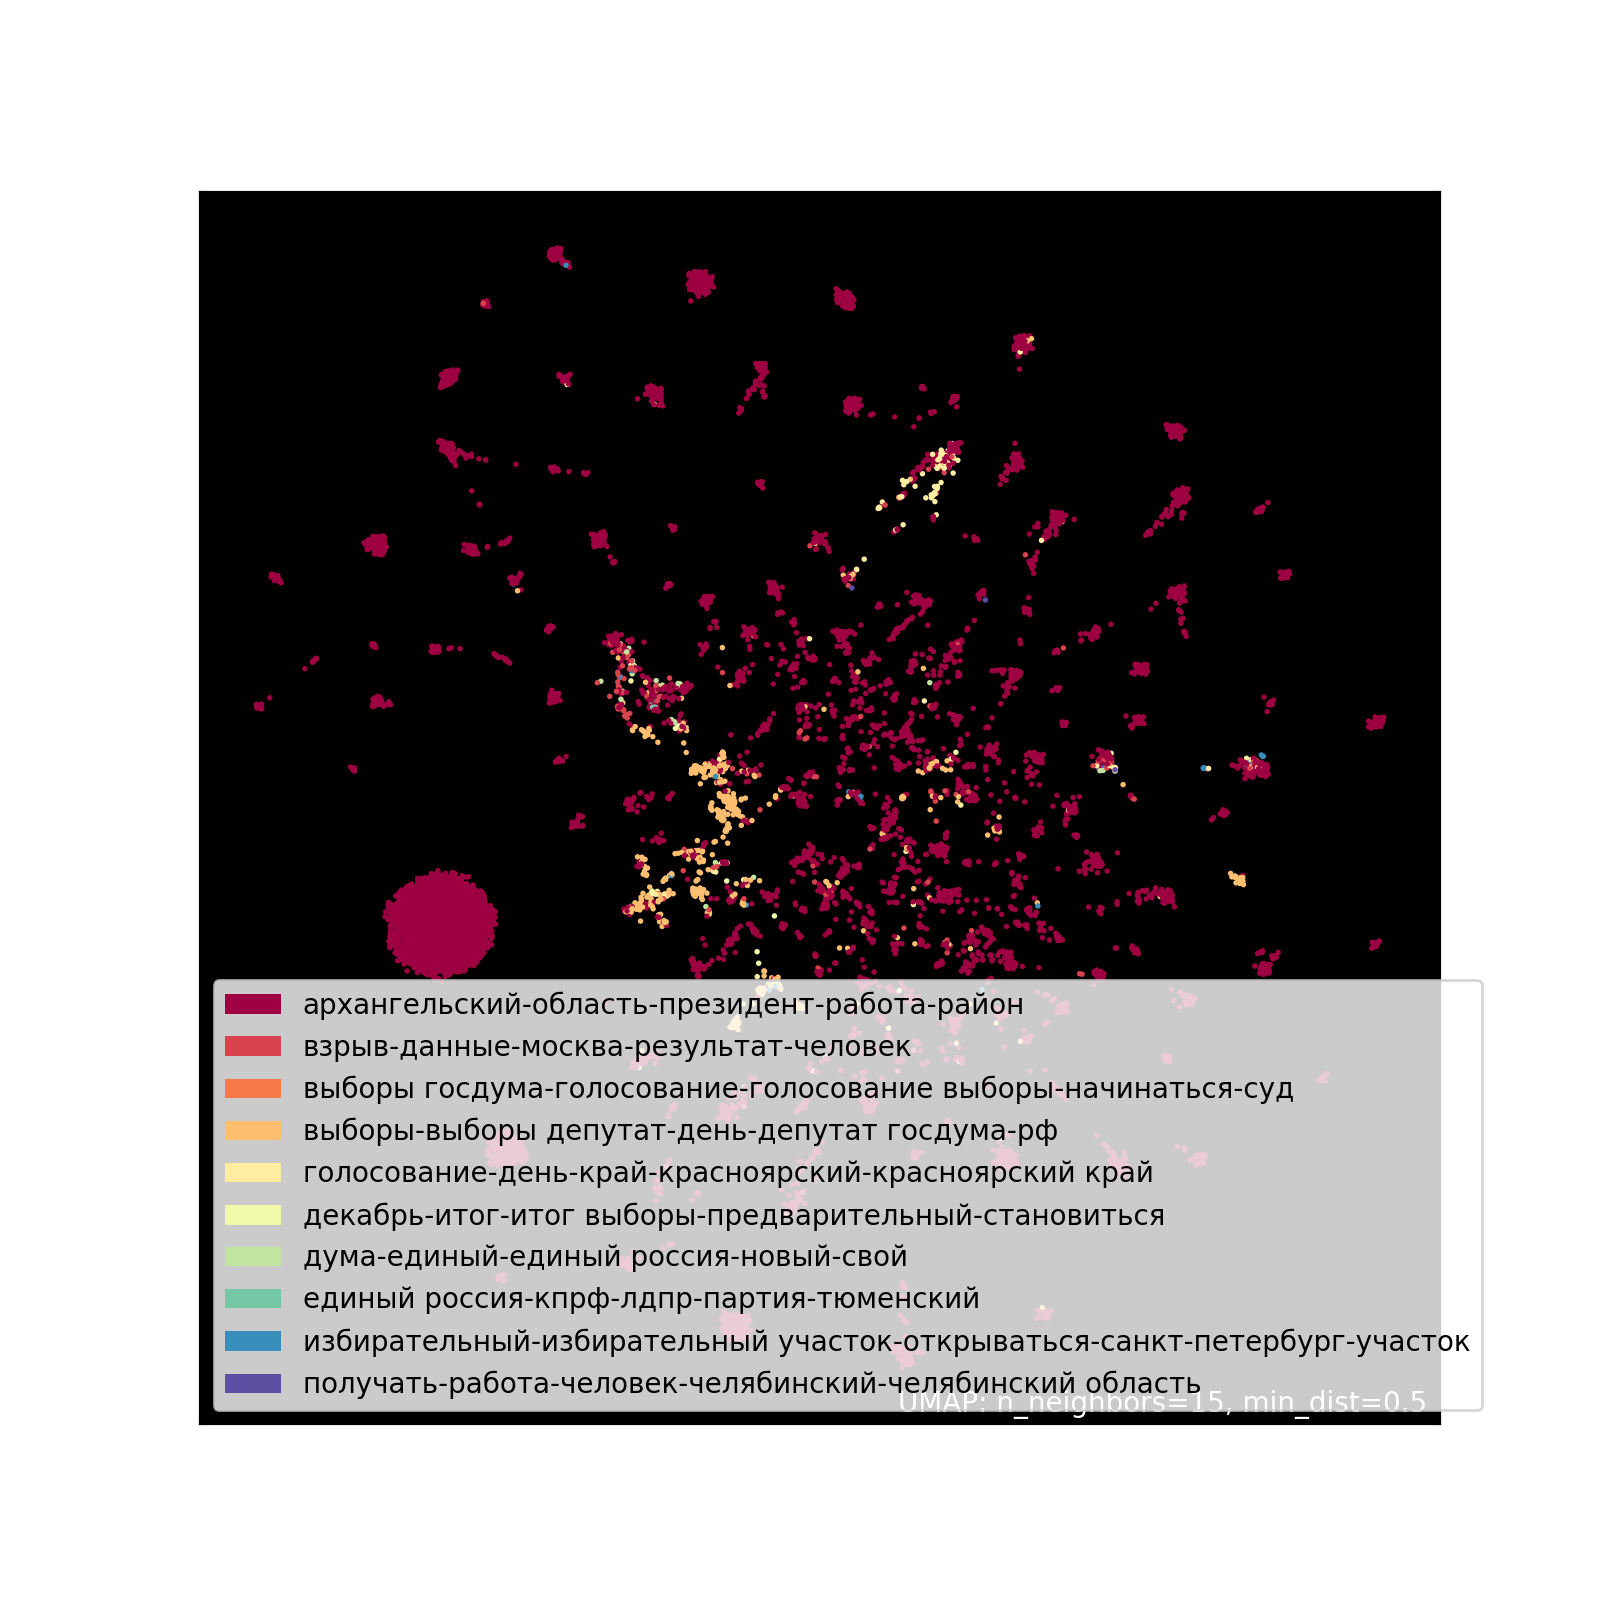

<AxesSubplot: >

In [54]:
vectors = tfidf_topics.to_numpy()

mapper = umap.UMAP(random_state=42, min_dist=0.5).fit(vectors)
umap.plot.points(mapper, labels=labels_true, background='black')

<IPython.core.display.Javascript object>


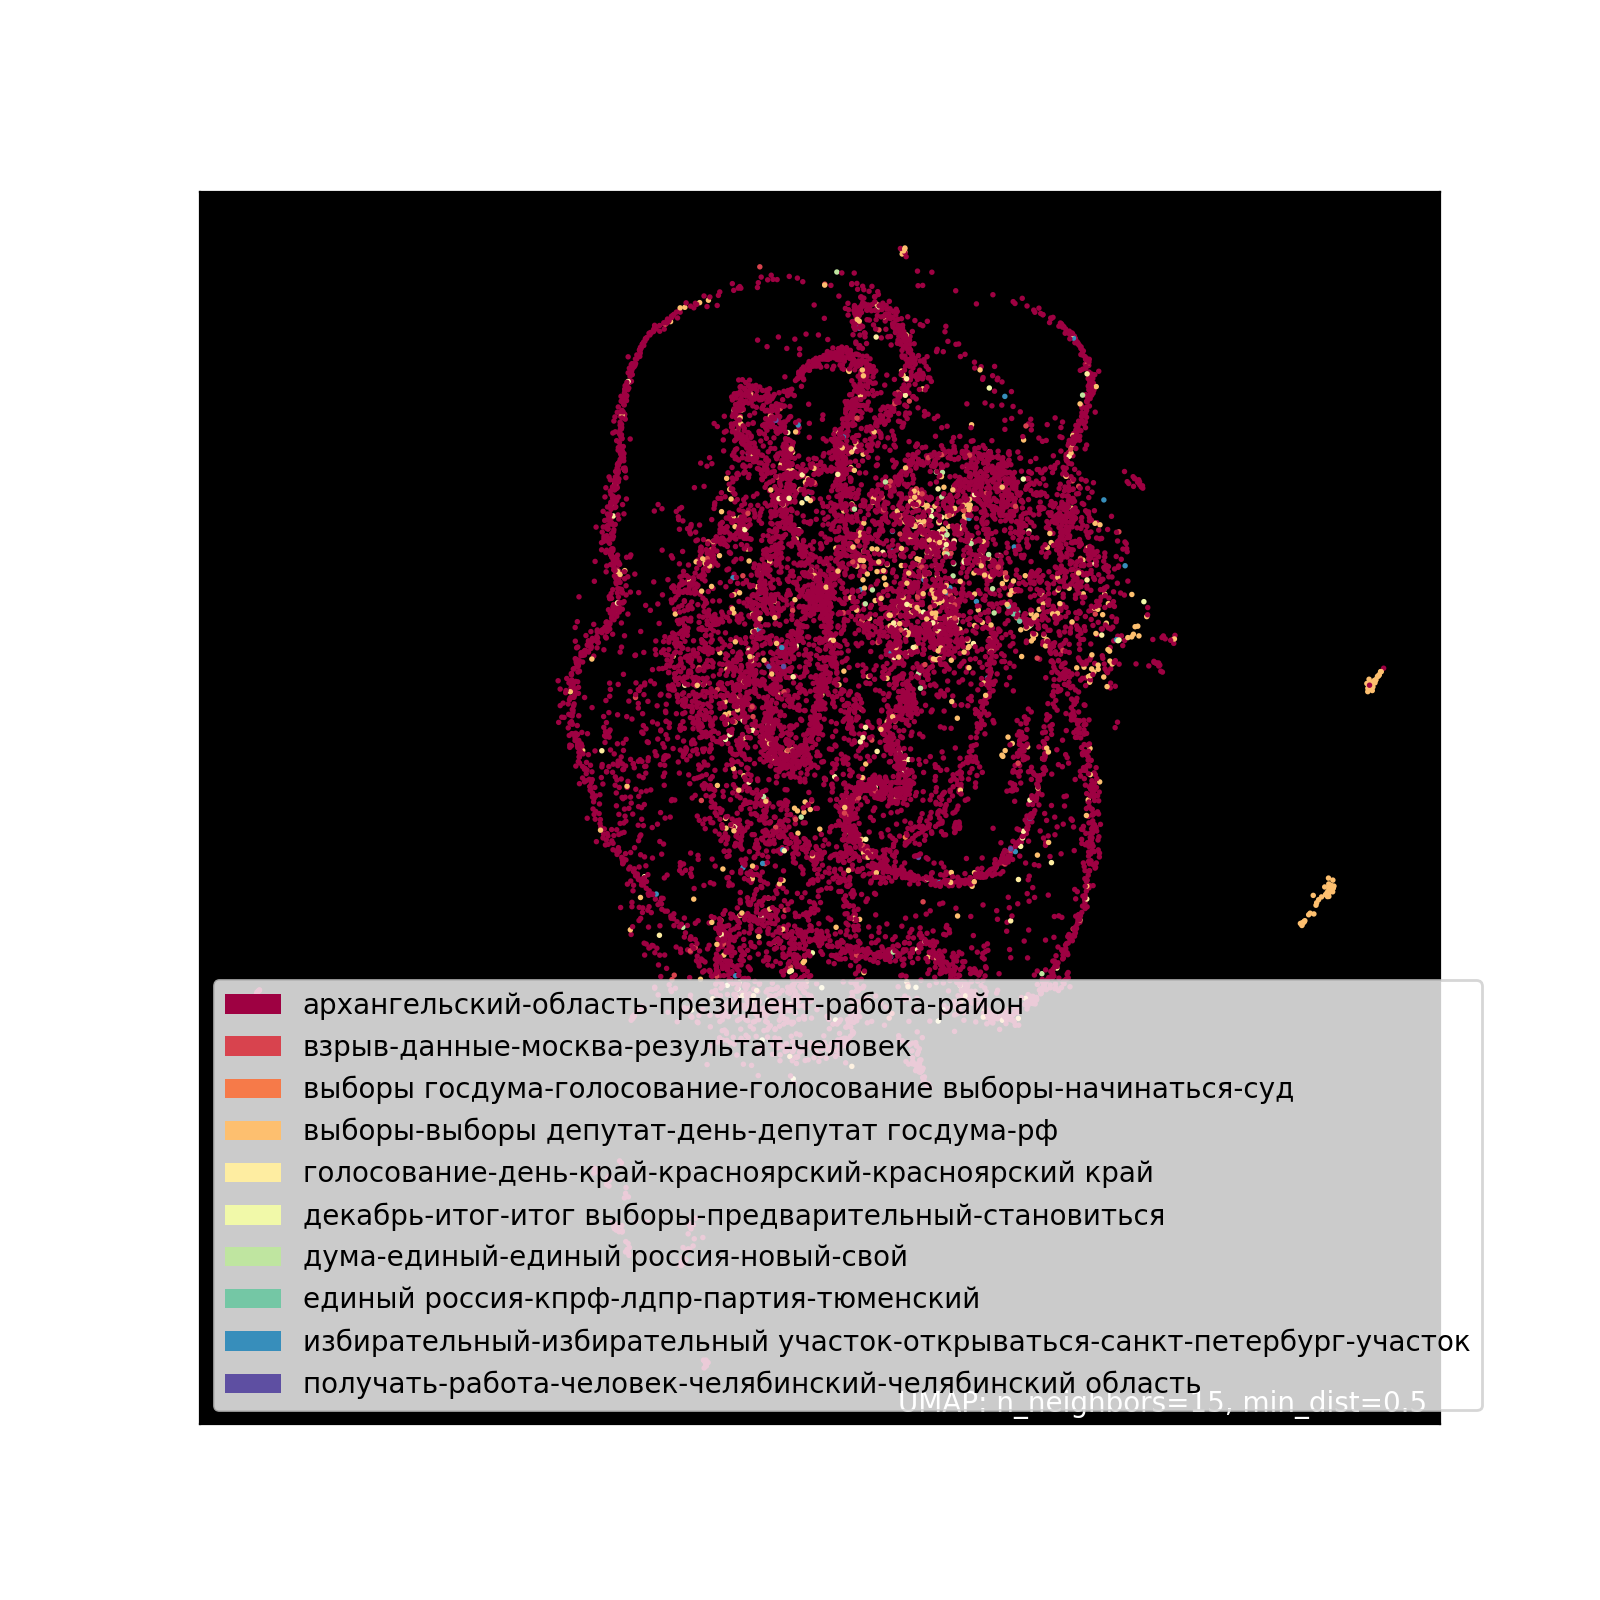

<AxesSubplot: >

In [56]:
vectors = tfidf_matrix.to_numpy()

mapper = umap.UMAP(random_state=42, min_dist=0.5).fit(vectors)
umap.plot.points(mapper, labels=labels_true, background='black')

In [ ]:
# имя кластера по tf-idf сформировать
dist_matrix = np.empty((tfidf_matrix.shape[0], tfidf_matrix.shape[0]))

N = 12
limit = 20
count = 0
for row in tfidf_matrix.iterrows():
    for col in tfidf_matrix.iterrows():
        if row[0] == col[0]:
            continue
    
        dist_matrix[row[0]][col[0]] = fuzzy_distance(row[1], col[1], N)
        
        if dist_matrix[row[0]][col[0]] <= limit:
            count += 1
            if count < 10:
                title_a = topics[row[0]]
                title_b = topics[col[0]]
                print(
    f'''{count}. Дубликат: "{title_a}" ({row[0]}) и "{title_b}" ({col[0]})\n Сходство: {100 - dist_matrix[row[0]][col[0]]}'''
                )

print(count)

1. Дубликат: "В Грозном задержаны два участника незаконных вооруженных формирований" (27) и "В Грозном задержаны "Беспредел" и "Маугли"" (2117)
 Сходство: 93.0


In [ ]:
print(texts[27], '\n')
print(texts[2117])